<a href="https://colab.research.google.com/github/Nikhilbablu/Nikhilbablu/blob/Nikhil/Assignment_05(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [2]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

In [3]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [4]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
penalties = ['l1', 'l2']
f1_train_scores = []
f1_test_scores = []
C_values = np.logspace(-3, 3, 10)

In [8]:
for penalty in penalties:
    for C in C_values:
        logreg = LogisticRegression(penalty=penalty, solver='liblinear', C=C, max_iter=200)
        logreg.fit(X_train, y_train)
        y_train_pred = logreg.predict(X_train)
        y_test_pred = logreg.predict(X_test)

        f1_train = f1_score(y_train, y_train_pred)
        f1_test = f1_score(y_test, y_test_pred)

        f1_train_scores.append((penalty, C, f1_train))
        f1_test_scores.append((penalty, C, f1_test))

In [9]:
f1_train_df = pd.DataFrame(f1_train_scores, columns=['Penalty', 'C', 'F1 Score'])
f1_test_df = pd.DataFrame(f1_test_scores, columns=['Penalty', 'C', 'F1 Score'])

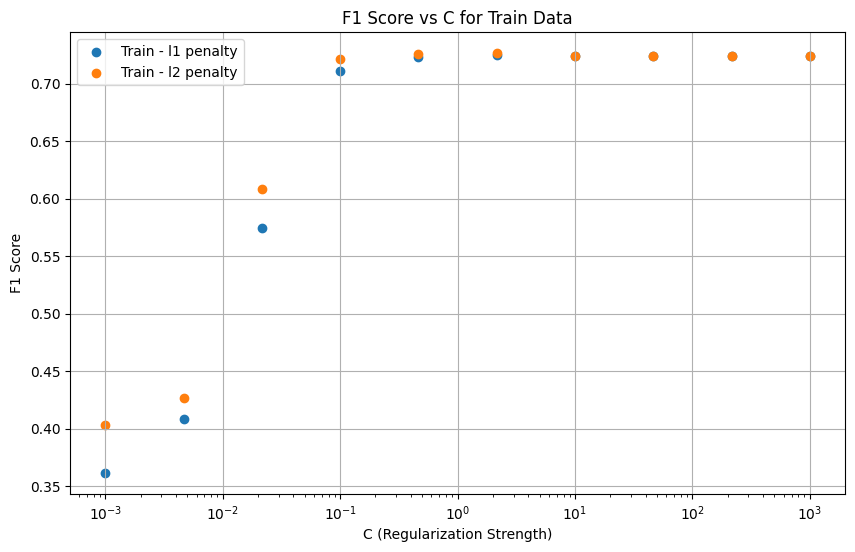

In [10]:
plt.figure(figsize=(10,6))
for penalty in penalties:
    penalty_data = f1_train_df[f1_train_df['Penalty'] == penalty]
    plt.scatter(penalty_data['C'], penalty_data['F1 Score'], label=f'Train - {penalty} penalty')

plt.xscale('log')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs C for Train Data')
plt.legend()
plt.grid(True)
plt.show()

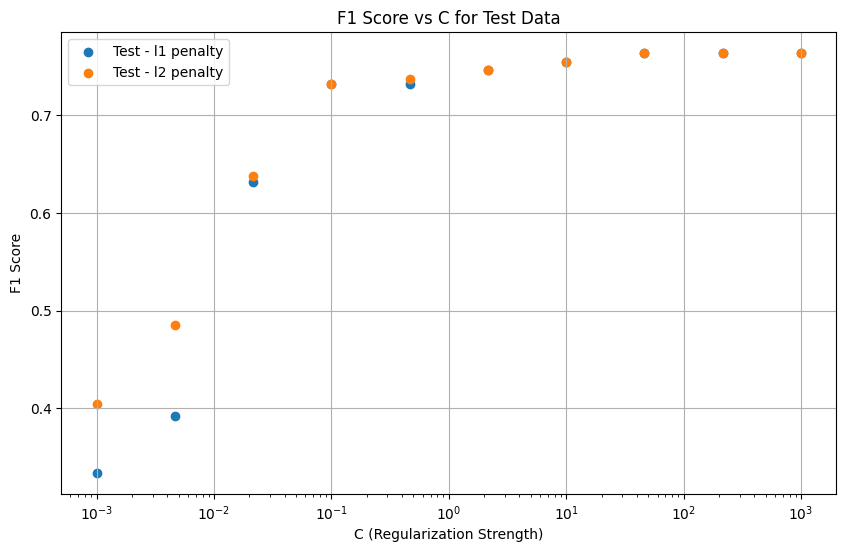

In [11]:
plt.figure(figsize=(10,6))
for penalty in penalties:
    penalty_data = f1_test_df[f1_test_df['Penalty'] == penalty]
    plt.scatter(penalty_data['C'], penalty_data['F1 Score'], label=f'Test - {penalty} penalty')

plt.xscale('log')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs C for Test Data')
plt.legend()
plt.grid(True)
plt.show()